# Statistics 2: Probabilities, Distributions, and Tests

In [85]:
import numpy as np
import pandas as pd

titanic_data = pd.read_csv('train.csv')
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking to see what columns need to be filled using the .info() method.

In [2]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Filling all NaN ages with the mean of all the ages and confirming with .info() method. 

In [5]:
titanic_data.Age = titanic_data.Age.fillna(np.mean(titanic_data.Age))

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Question 1
Calculating the probability of survival during Titanic crash.

In [19]:
surviors = titanic_data[titanic_data.Survived == 1]
survior_prob = (len(surviors) / len(titanic_data))
print("There is a " + str(survior_prob) + " percent chance of survival.")

There is a 0.3838383838383838 percent chance of survival.


## Question 2
CHOOSE TWO OF...
 - A passenger was male
 - A passenger was female and had atleast 1 SibSp on board
 - A survior was from Cherbourg

We elected to see the probability that a passenger was male.

In [21]:
male_passenger = titanic_data[titanic_data.Sex == 'male']
prob_male = (len(male_passenger) / len(titanic_data))
print("There is a " + str(prob_male) + " percent chance that a passenger is male.")

There is a 0.6475869809203143 percent chance that a passenger is male.


We elected to see the probablity that a survior was from Cherbourg.

In [25]:
c_port = surviors[surviors.Embarked == 'C']
prob_c = (len(c_port) / len(surviors))
print("There is a " + str(prob_c) + " percent chance that a survior is from Cherbourg.")

There is a 0.2719298245614035 percent chance that a survior is from Cherbourg.


## Question 3
Plot the distribution of passenger ages. (Bins = 25)

We removed all the ages that were NaN and made then equal to the mean, so in order to plot the ages, we rounded the mean to the third decimal and removed all the ages that had the same decimal rounding.

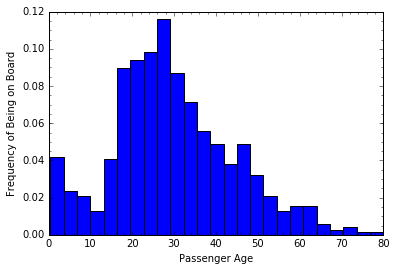

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
all_ages = []
age_mean = np.mean(titanic_data.Age)

for i, k in enumerate(titanic_data.Age): 
    if round(k, 3) != round(age_mean, 3):
        all_ages.append(k)

H, edges = np.histogram(all_ages, bins=25)

ax = plt.subplot(111)
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
ax.set_xlabel("Passenger Age")
ax.set_ylabel("Frequency of Being on Board")
ax.minorticks_on()
plt.show()

## Question 4
Find the probability that a passenger was less than 10 years old.

In [78]:
less_then_ten = []
for i in all_ages:
    if i < 10:
        less_then_ten.append(i)
        
prob_less_then_ten = (len(less_then_ten) / len(all_ages))
print("There is a " + str(round(prob_less_then_ten, 3)) + " probabililty that a passenger was 10 year old.") 

There is a 0.087 probabililty that a passenger was 10 year old.


## Question 5
Given 100 passengers at random, determine the probability that exactly 42 passengers survive.

In [88]:
from scipy.stats import binom
binom.pmf(42, 100, survior_prob)

0.061330411815167886

There is a 0.0613 probability that exactly 42 passenger survive out of 100.

## Question 5
The probability that at least 42 of those 100 passenger survive.    

In [89]:
1 - binom.cdf(42, 100, survior_prob)

0.19807683025744727

There is a 0.198 probability that at least 42 of those 100 passenger survive.

## Question 6
Is there a statistically significant difference between the age of male and female surviors


In [97]:
from scipy.stats import ttest_ind
surviors_male = surviors[surviors.Sex == 'male']
surviors_female = surviors[surviors.Sex == 'female']
t_stat, p_value = ttest_ind(surviors_male.Age, surviors_female.Age)

print("Results:\n\tt-statistic: %.5f\n\tp-value: %.5f" % (t_stat, p_value))

Results:
	t-statistic: -0.84281
	p-value: 0.39993


There is no significance between the age of female and male surviors. This is because the p-value is greater than 0.05.

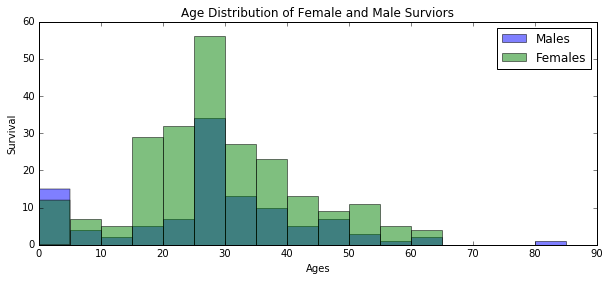

In [104]:
plt.figure(figsize=(10, 4))
opacity = 0.5

# for i, k in enumerate(titanic_data.Age): 
#     if round(k, 3) != round(age_mean, 3):
#         all_ages.append(k)

plt.hist(surviors_male.Age, bins=np.arange(0, 90, 5), alpha=opacity, label="Males")
plt.hist(surviors_female.Age, bins=np.arange(0, 90, 5), alpha=opacity, label="Females")
plt.legend()
plt.title("Age Distribution of Female and Male Surviors")
plt.xlabel("Ages")
plt.ylabel("Survival")
plt.show()

## Question 7
Is there a statistically significant difference between the fares paid by passengers between Queentown and the passengers from Cherbourg.

In [108]:
from scipy.stats import ttest_ind
fare_from_q = titanic_data[titanic_data.Embarked == 'Q']
fare_from_c = titanic_data[titanic_data.Embarked == 'C']
t_stat, p_value = ttest_ind(fare_from_q.Fare, fare_from_c.Fare)

print("Results:\n\tt-statistic: %.5f\n\tp-value: %.5f" % (t_stat, p_value))

Results:
	t-statistic: -4.84439
	p-value: 0.00000


There is no significance between the age of female and male surviors. This is because the p-value is less than 0.01.

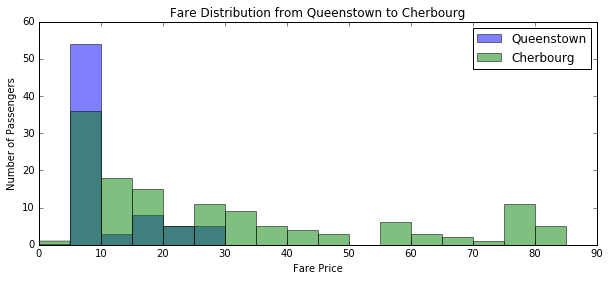

In [109]:
plt.figure(figsize=(10, 4))
opacity = 0.5

# for i, k in enumerate(titanic_data.Age): 
#     if round(k, 3) != round(age_mean, 3):
#         all_ages.append(k)

plt.hist(fare_from_q.Fare, bins=np.arange(0, 90, 5), alpha=opacity, label="Queenstown")
plt.hist(fare_from_c.Fare, bins=np.arange(0, 90, 5), alpha=opacity, label="Cherbourg")
plt.legend()
plt.title("Fare Distribution from Queenstown to Cherbourg")
plt.xlabel("Fare Price")
plt.ylabel("Number of Passengers")
plt.show()